# SalishSeaCast NEMO Results Visualization

Information about SalishSeaCast NEMO model results storage,
and exploration of visualization of those results using `xarray`
and `matplotlib`.

Started during discussion of results visualization with Rachael
on 12-Oct-2018. Narrative added later.

In [17]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import arrow
import cmocean

`xarray` is a package for working with n-dimensional labelled arrays in a way that is
inspired by the way that `pandas` works with 2-dimensional data.
In particular,
`xarray.Dataset` is an in-memory respresentation of a netCDF file.
`xarray` relies on `pandas`,
but we don't need to (and shouldn't) import it unless we need to use object from it.

* [`xarray` docs](https://xarray.pydata.org/en/stable/)
* [`pandas` docs](https://pandas.pydata.org/)

`matplotlib` is a 2-D plotting library.
`matplotlib.pyplot` provides a MATLAB-like interface.
`xarray` and `pandas` both provide `plot()` methods that enable quick plotting of data
that relies on `matplotlib` without having to dive into all of its details.

* [`matplotlib` docs](https://matplotlib.org/)

`numpy` is the fundamental n-dimensional array package in Python.
`xarray`, `pandas`, and `matplotlib` all rely on it.
It is imported here because we tried to use its masked-array object in the discussion below,
otherwise there would be no need to import it explicitly,
the packages that rely on it import it behind the scenes as needed.

* [`numpy` docs](http://www.numpy.org/)

`array` is a package for working with dates/times that improves on the 
Python standard library `datetime` module.
We didn't end up using it in this notebook,
but I'm leaving the import in for purposes of documentation,
and perhaps future additions to the notebook.

* [`arrow` docs](https://arrow.readthedocs.io/en/latest/)

`cmocean` is a package of [perceptually uniform](http://bids.github.io/colormap/)
colour maps for oceanography

* [`cmocean` docs](https://matplotlib.org/cmocean/)

Enable `jupyter` to display plots in the notebook below the code that generates them:

In [2]:
%matplotlib inline

In [3]:
ds = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DTracerFields1hV17-02')
ds

<xarray.Dataset>
Dimensions:      (depth: 40, gridX: 398, gridY: 898, time: 35640)
Coordinates:
  * time         (time) datetime64[ns] 2014-09-14T00:30:00 ... 2018-10-11T23:30:00
  * depth        (depth) float32 0.5000003 1.5000031 ... 414.5341 441.4661
  * gridY        (gridY) int16 0 1 2 3 4 5 6 7 ... 891 892 893 894 895 896 897
  * gridX        (gridX) int16 0 1 2 3 4 5 6 7 ... 391 392 393 394 395 396 397
Data variables:
    buoy_n2      (time, depth, gridY, gridX) float32 ...
    salinity     (time, depth, gridY, gridX) float32 ...
    temperature  (time, depth, gridY, gridX) float32 ...
Attributes:
    acknowledgement:           MEOPAR, ONC, Compute Canada
    cdm_data_type:             Grid
    comment:                   If you use this dataset in your research,\nple...
    Conventions:               CF-1.6, COARDS, ACDD-1.3
    creator_email:             sallen@eoas.ubc.ca
    creator_name:              Salish Sea MEOPAR Project Contributors
    creator_url:               https:

In [4]:
ds.salinity

<xarray.DataArray 'salinity' (time: 35640, depth: 40, gridY: 898, gridX: 398)>
[509515142400 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2014-09-14T00:30:00 ... 2018-10-11T23:30:00
  * depth    (depth) float32 0.5000003 1.5000031 2.5000114 ... 414.5341 441.4661
  * gridY    (gridY) int16 0 1 2 3 4 5 6 7 8 ... 890 891 892 893 894 895 896 897
  * gridX    (gridX) int16 0 1 2 3 4 5 6 7 8 ... 390 391 392 393 394 395 396 397
Attributes:
    _ChunkSizes:            [  1  40 898 398]
    colorBarMaximum:        34.0
    colorBarMinimum:        0.0
    coverage_content_type:  modelResult
    ioos_category:          salinity
    long_name:              salinity
    standard_name:          sea_water_reference_salinity
    units:                  g kg-1

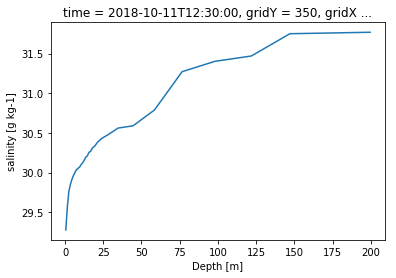

In [6]:
ds.salinity.sel(time='2018-10-11 12:30', depth=slice(0.5, 200), gridY=350, gridX=250).plot()

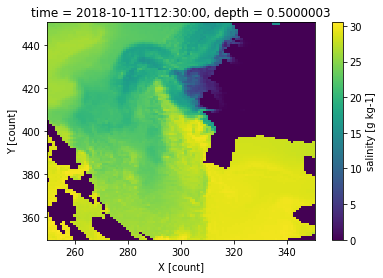

In [11]:
ds.salinity.sel(time='2018-10-11 12:30', gridY=slice(350, 450), gridX=slice(250, 350)).isel(depth=0).plot()

In [12]:
type(ds.salinity)

xarray.core.dataarray.DataArray

In [14]:
type(ds.salinity.sel(time='2018-10-11 12:30', gridY=slice(350, 450), gridX=slice(250, 350)).isel(depth=0).values)

numpy.ndarray

In [14]:
ds.salinity.sel(time='2018-10-11 12:30', gridY=slice(350, 450), gridX=slice(250, 350)).isel(depth=0).values)

numpy.ndarray

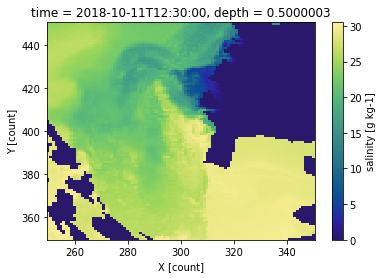

In [18]:
ds.salinity.sel(time='2018-10-11 12:30', gridY=slice(350, 450), gridX=slice(250, 350)).isel(depth=0).plot(cmap=cmocean.cm.haline)

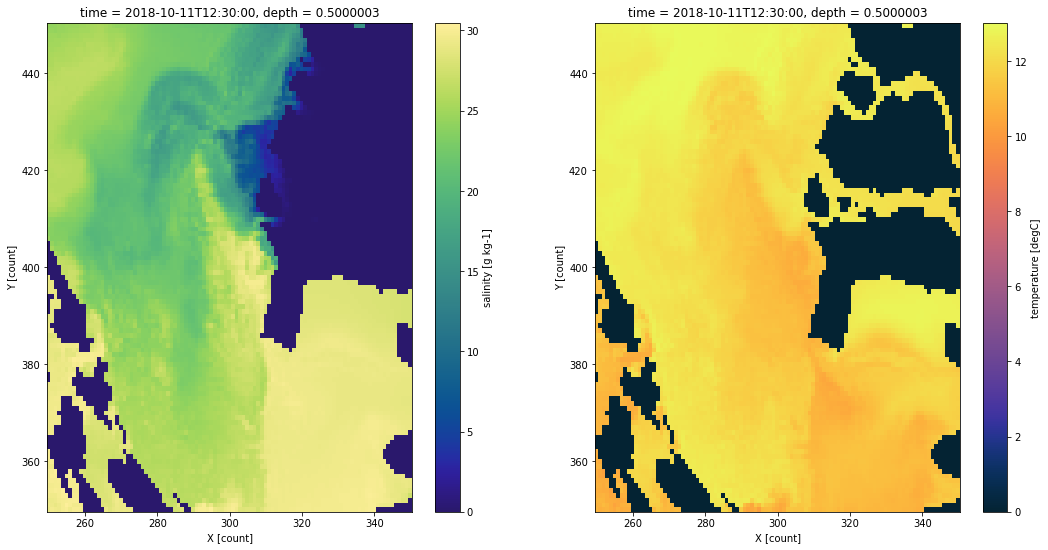

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))
ds.salinity.sel(time='2018-10-11 12:30', gridY=slice(350, 450), gridX=slice(250, 350)).isel(depth=0).plot(ax=ax1, cmap=cmocean.cm.haline)
ds.temperature.sel(time='2018-10-11 12:30', gridY=slice(350, 450), gridX=slice(250, 350)).isel(depth=0).plot(ax=ax2, cmap=cmocean.cm.thermal)

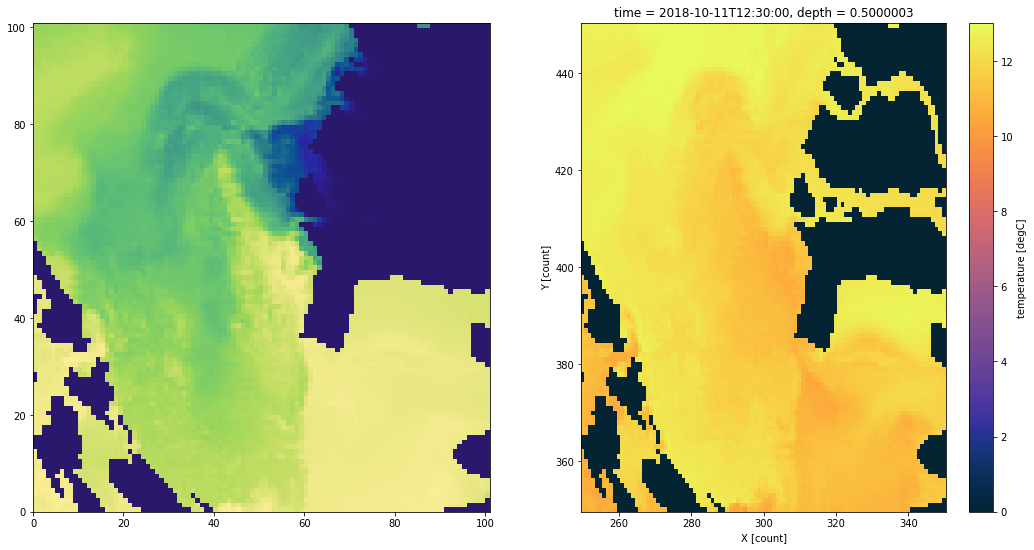

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))
ax1.pcolormesh(
    ds.salinity.sel(time='2018-10-11 12:30', gridY=slice(350, 450), gridX=slice(250, 350)).isel(depth=0),
    cmap=cmocean.cm.haline
)
ds.temperature.sel(time='2018-10-11 12:30', gridY=slice(350, 450), gridX=slice(250, 350)).isel(depth=0).plot(ax=ax2, cmap=cmocean.cm.thermal)

In [25]:
bio = xr.open_dataset('/results/SalishSea/nowcast-green/11oct18/SalishSea_1d_20181011_20181011_ptrc_T.nc')
bio

<xarray.Dataset>
Dimensions:                       (axis_nbounds: 2, deptht: 40, nvertex: 4, time_counter: 1, x: 398, y: 898)
Coordinates:
    nav_lat                       (y, x) float32 ...
    nav_lon                       (y, x) float32 ...
  * deptht                        (deptht) float32 0.5000003 ... 441.4661
    time_centered                 (time_counter) datetime64[ns] ...
  * time_counter                  (time_counter) datetime64[ns] 2018-10-11T12:00:00
Dimensions without coordinates: axis_nbounds, nvertex, x, y
Data variables:
    bounds_lon                    (y, x, nvertex) float32 ...
    bounds_lat                    (y, x, nvertex) float32 ...
    area                          (y, x) float32 ...
    deptht_bounds                 (deptht, axis_nbounds) float32 ...
    nitrate                       (time_counter, deptht, y, x) float32 ...
    time_centered_bounds          (time_counter, axis_nbounds) float64 ...
    time_counter_bounds           (time_counter, axis_nbo